In [3]:
import numpy as np
from qiskit import QuantumCircuit, Aer 
from qiskit.visualization import plot_histogram 

# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, quantum_info, IBMQ, Aer, execute
from qiskit.compiler import transpile, assemble
from qiskit.visualization import plot_bloch_multivector, plot_state_qsphere, plot_histogram

# The Bernstein-Vazirani Problem

Let us consider a boolean function $f$ that take as input a string of $N$ bits $x=x_0x_1x_2\cdots$, and return its bitwise product with some secret string $s=s_0s_1s_2\cdots$, that is: 

$$f(x)= s\cdot x (mod 2). $$

The goal is find the secreat string $s$. The classical solution of this problem consist in query an oracle of the function with inputs given by strings $x^{(n)}$ which have only a single 1 on the position $n$, 

$$x^{(0)}=100\cdots 0, \quad x^{(1)}=010\cdots 0, \quad  x^{(2)}=001\cdots 0, \quad \dots \quad,\quad x^{(N-1)}= 000\cdots1.$$

Each query reveals a different bit of $s$, that is $ s_n = f(x^{n}) $. Therefore, we need to call the oracle $n$ times to find $s$.



# The quantum solution

Using a quantum computer, we can solve this problem with 100% confidence with only a single call of the oracle. In this lecture we will implement this algoritm using qiskit. 

## Problem 1
Create a quantum circuit called $\rm qc$ with $N+1$ quantum bits and $N$ classical bits, with $N=3$. The first $N$ qubits will code the bit string to query the oracle, and the last qubit is an ancillary to implement the oracle.

In [5]:

#### write your code here ####
n = 3
qr = QuantumRegister(n+1, name="q")   # Protocol uses 3 qubits
cr = ClassicalRegister(n, name="c")   # and 2 classical bits

qc = QuantumCircuit(qr, cr)

##############################

qc1 = qc.copy()

## Problem 2
Apply hadamard gates to the first $N$ qubit of $\rm qc$. This means that the input for the oracle will be a superposition.

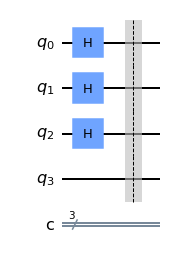

In [12]:
qc = qc1.copy()

#### write your code here ####

##Normal loop
#for i in range(0,n)
#    qc.h(i)

## quick loop - same stuff but shorter notation
qc.h(range(n))

##############################

qc.barrier()
qc2 = qc.copy()
qc.draw(output='mpl')

## Problem 3
Now we going to construct the oracle for the function $f$ with $s=110$ with the Phase-kickback trick. First, initialize the ancillary qubit in the state $|-\rangle=(|0\rangle-|1\rangle)/\sqrt{2}$.

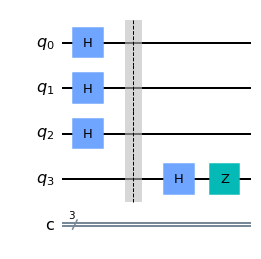

In [17]:
qc = qc2.copy()
s = '110'

#### write your code here ####

qc.h(n)
qc.z(n)

##############################

qc3 = qc.copy()
qc.draw(output='mpl')

## Problem 4
Let consider the bit string $\bar{s}=s_{N-1}s_{N-2}\cdots s_0$, which correspond to reverse the bits of $s$. Apply a CNOT gate between the qubit $j$ and the ancillary qubit if $\bar{s}_j=1$, for $j=0,1,\dots,N-1$.

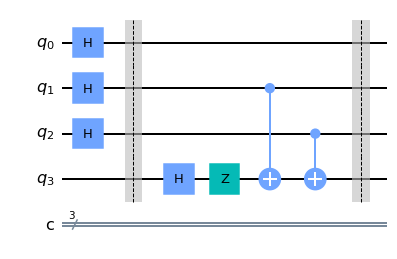

In [30]:
qc = qc3.copy()

#### write your code here ####

for j in range(n):
    if(s[-j-1] == "1"):
        qc.cx(j,n)

##############################

qc.barrier()
qc4 = qc.copy()
qc.draw(output='mpl')

## Problem 5
Apply hadamard gates to the first $N$ qubits.

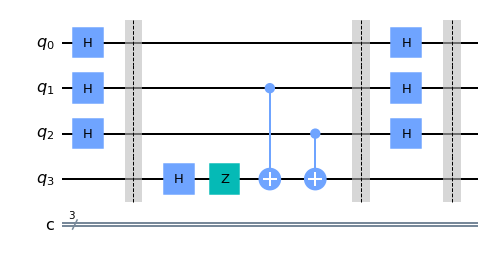

In [31]:
qc = qc4.copy()

#### write your code here ####

qc.h(range(n))

##############################

qc5 = qc
qc.barrier()
qc.draw(output='mpl')

## Problem 6
Perform quantum measurements in the first $N$ qubits and save its outcome in the $N$ classical bits of qc.

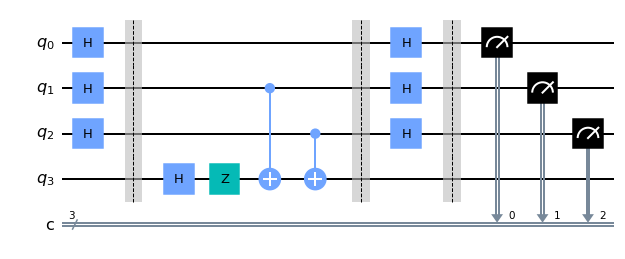

In [33]:
qc = qc5.copy()

#### write your code here ####

qc.measure(range(n),range(n))

   
##############################

qc6 = qc
qc.draw(output='mpl')

## Problem 7
Run a simulation of the experiment with the aer_simulator. Extract the counts from the results is save them in a variable called ${\rm counts}$. 

In [42]:
qc = qc6.copy()

#### write your code here ####

backend = Aer.get_backend('qasm_simulator')
job_exp = execute(qc, backend=backend, shots=1)

exp_result = job_exp.result()
counts = exp_result.get_counts(qc)
print(counts)


##############################

{'110': 1}


## Problem 8
Plot a histogram of the counts.

s = 110
{'110': 1000}


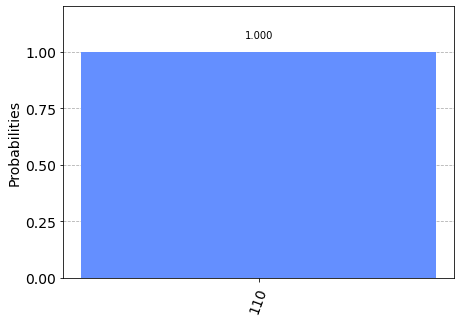

In [41]:
print(r's =', s)
#### write your code here ####


exp_measurement_result = exp_result.get_counts(qc)
print(exp_measurement_result)
plot_histogram(exp_measurement_result)

##############################
